# 4. Data Visualization Questions

(A)​      ​Use “Service Area Dataset” from MongoDB. Find and plot the count of ​ServiceAreaName, SourceName , and BusinessYear ​across the country each state? 

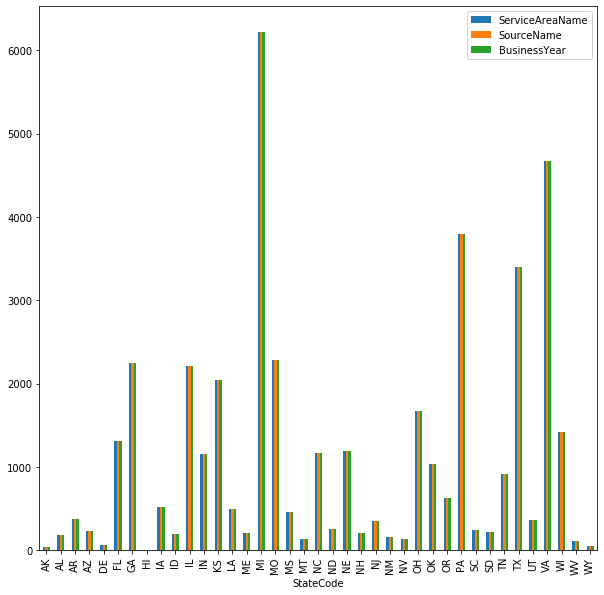

In [134]:
# Import PyMongo to Connect the MongoClient and Find the ServiceAreaName, SourceName , and BusinessYear 
# across the country each state
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
client = MongoClient('localhost',27017)
# print('Connect to the MongoDB Client')
db = client.health_insurance
collection = db.health_insurance_service
data = pd.DataFrame(list(collection.find()))
state_count_df = data.groupby('StateCode').count()
a = state_count_df[['ServiceAreaName','SourceName','BusinessYear']]
a.plot.bar(figsize=(10,10))
plt.show() 

(B)​      ​Use “Service Area Dataset” from MongoDB. Find and plot the count of “​sources​” across the country. 

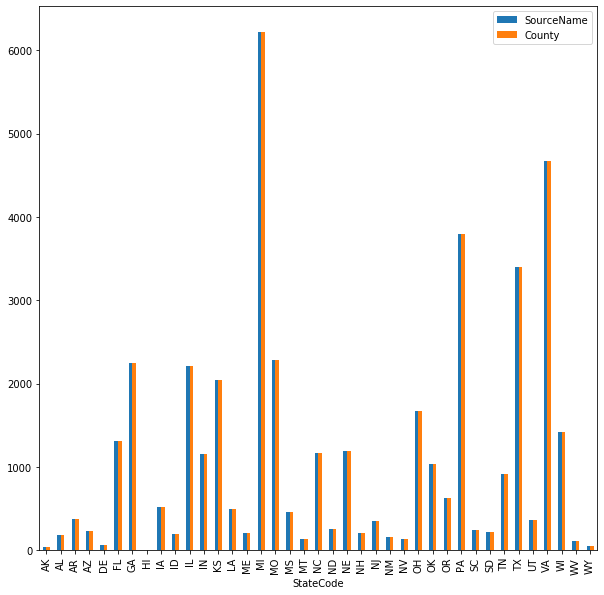

In [135]:
# The following plot shows the sourcename for the country.
source_count_df = data.groupby('SourceName').count()
b = state_count_df[['SourceName','County']]
b.plot.bar(figsize=(10,10))
plt.show()

(C)​      ​Use the “Benefit Cost Sharing” dataset from MongoDB. Find and plot the number of benefit plans in each state. 

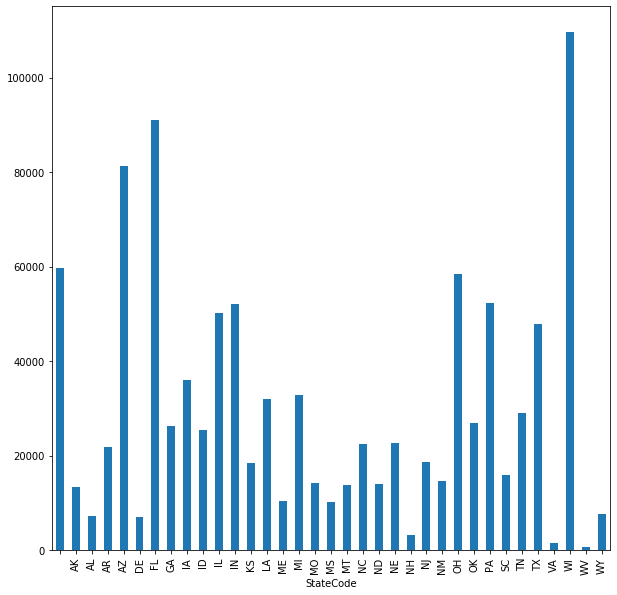

In [136]:
# Import PyMongo to Connect the MongoClient and using Benefit Cost Sharing dataset.
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
client = MongoClient('localhost',27017)
# print('Connect to the MongoDB Client')
d1 = db.health_insurance_benefit
d2 = pd.DataFrame(list(d1.find()))
d3 = d2[['BenefitName','StateCode']].groupby(['StateCode'])['BenefitName'].count()
d3.plot.bar(figsize = (10,10))
plt.show()
# The plot will show the benefit plans in each state, Wisconsin has the highest benefit plans in the country.

(D) ​      ​Use the “Insurance” dataset from MongoDB and find the number of mothers who smoke and also have children. 

In [137]:
# Import pymongo module and using insurance dataset
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
client = MongoClient('localhost',27017)
# print('Connect to the MongoDB Client')
e1 = db.health_insurance_insurancecharges
e2 = pd.DataFrame(list(e1.find()))

In [138]:
e3=('The number of mother who smoke and also have children are ', e2[(e2['sex']=='female') & \
                                                                 (e2['smoker']=='yes') & \
                                                                 (e2['children']>0)]['_id'].count())
print(e3)
# The number of monther who smoke and also have children are 124 according to the dataset.

('The number of mother who smoke and also have children are ', 124)


(E)       ​Use the “Insurance” dataset from MongoDB. Find out which region has the highest rate of smokers. Plot the results for each region. 

Connect to the MongoDB Client


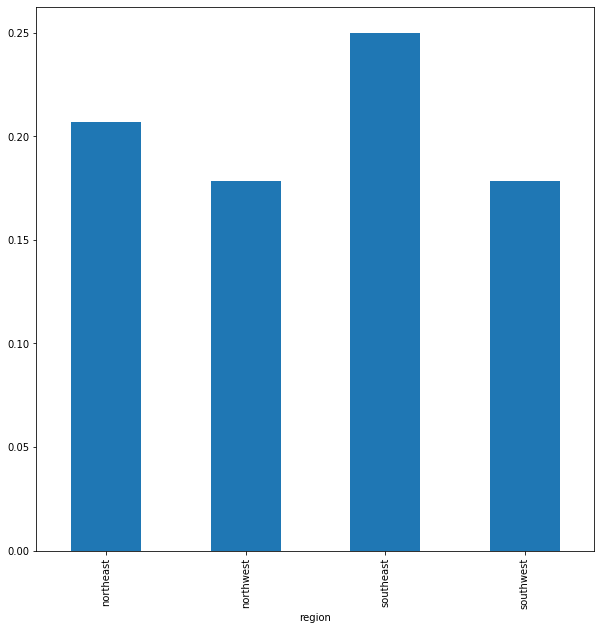

In [139]:
# Import PyMongo to Connect the MongoClient and using insurance dataset to find out the region has the highest rate of smokers.
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
client = MongoClient('localhost',27017)
print('Connect to the MongoDB Client')
f1 = db.health_insurance_insurancecharges
f2 = pd.DataFrame(list(f1.find()))
f3 = f2.groupby('region').count()['_id']
sm = f2[f2.smoker == 'yes'].groupby('region').count()['_id']
xyz = sm / f3
xyz.plot.bar(figsize=(10,10))
plt.show()
# The following graph shows that Southeastern region has the hightest rate more smokers.